In [1]:
!python -m pip install --upgrade pip
!pip install gwpy
!pip install matplotlib
!pip install numpy==1.23.5 --no-cache-dir
!pip install h5py
!pip install pycbc

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------- ----- 1.6/1.8 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     -------- ------------------------------- 2.4/10.7 MB 22.3 MB/s eta 0:00:01
     ---------------- ----------------------- 4.5/10.7 MB 15.8 MB/s eta 0:00:01
     -------------------- ------------------- 5.5/10.7 MB 10.5 MB/s eta 0:00:01
     ----------------------- ---------------- 6.3/10.7 MB 8.4 MB/s eta 0:00:01
     ------------------------- -------------- 6.8/10.7 MB 7.1 MB/s eta 0:00:01
     ---------------------------- ----------- 7.6/10.7 MB 6.7 MB/s eta 0:00:01
     ------------------------------- -------- 8.4/10.7 MB 6.0 MB/s eta 0:00:01
     -

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\yuvra\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
    File "C:\Users\yuvra\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\yuvra\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 137, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\yuvra\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 70, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^^^^^

     ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
     ----------------------- ---------------- 2.1/3.6 MB 16.7 MB/s eta 0:00:01
     ---------------------------------------- 3.6/3.6 MB 9.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cython-3.1.0-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached mpld3-0.5.10-py3-none-any.whl.metadata (5.1 kB)
  Using cached pegasus-wms.api-5.0.9.tar.gz (47 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): s

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Ignoring numpy: markers 'python_version <= "3.7"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.9"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.10"' don't match your environment
    Using cached setuptools-80.7.1-py3-none-any.whl.metadata (6.6 kB)
    Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
    Using cached Cython-3.0.12-cp312-cp312-win_amd64.whl.metadata (3.6 kB)
    Using cached numpy-1.23.4.tar.gz (10.7 MB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'error'
    error: subprocess-exited-with-erro

Importing libraries

In [3]:
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
import numpy as np
import h5py

### Step 1. Loading the data

In [17]:
# Open the HDF5 file
file_path = "H-H1_GWOSC_16KHZ_R1-1264316101-32.hdf5"
with h5py.File(file_path, "r") as hdf:
    # List all groups (datasets and sub-groups)
    print("Keys:", list(hdf.keys()))

Keys: ['meta', 'quality', 'strain']


### Step 2. Plotting the data without removing noise

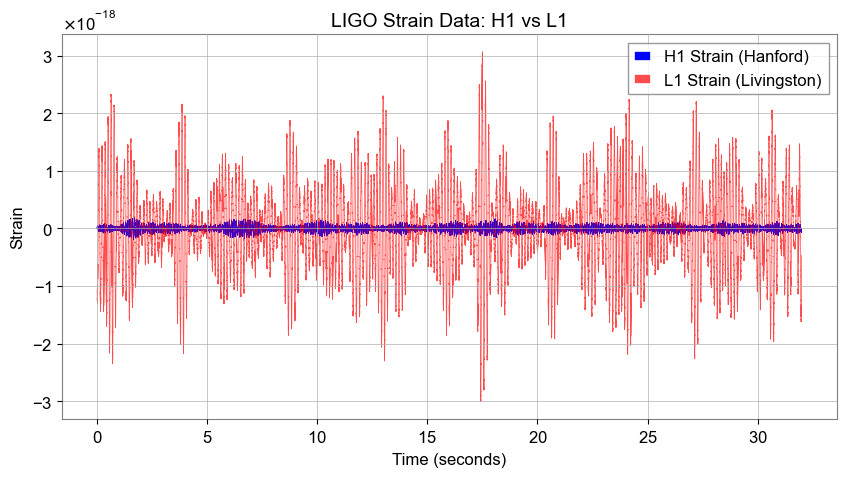

In [19]:
# File paths for H1 and L1 arms
file_H1 = "H-H1_GWOSC_16KHZ_R1-1264316101-32.hdf5"
file_L1 = "L-L1_GWOSC_16KHZ_R1-1264316101-32.hdf5"

def load_strain(file_path):
    """Loads strain data and time array from a LIGO GWOSC HDF5 file."""
    with h5py.File(file_path, "r") as hdf:
        strain = hdf["strain"]["Strain"][:]  # Extract strain data
        ts = hdf["strain"]["Strain"].attrs["Xspacing"]  # Time step size
        time = np.arange(0, len(strain) * ts, ts)  # Create time array
    return time, strain

# Load strain and time for both detectors
time_H1, strain_H1 = load_strain(file_H1)
time_L1, strain_L1 = load_strain(file_L1)

# Plot strain data for both arms
plt.figure(figsize=(10, 5))
plt.plot(time_H1, strain_H1, label="H1 Strain (Hanford)", color="blue", linewidth=0.5)
plt.plot(time_L1, strain_L1, label="L1 Strain (Livingston)", color="red", linewidth=0.5, alpha=0.7)

# Formatting the plot
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Strain", fontsize=12)
plt.title("LIGO Strain Data: H1 vs L1", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('Strain data plot.png', dpi=300)
plt.show()